<a href="https://colab.research.google.com/github/boboprods/ML_Mini_Projects/blob/main/digitClassification_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

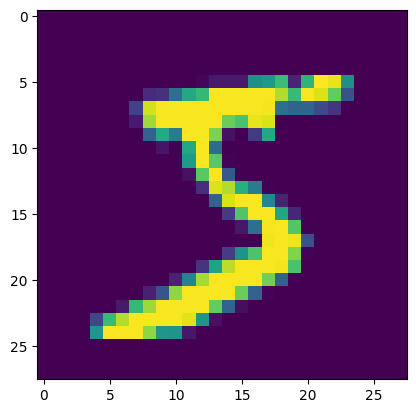

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam')

In [10]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 28s 17ms/step - loss: 0.2838 - val_loss: 0.1582
Epoch 2/25
1500/1500 [==============================] - 30s 20ms/step - loss: 0.1210 - val_loss: 0.1228
Epoch 3/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0842 - val_loss: 0.1167
Epoch 4/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0639 - val_loss: 0.0964
Epoch 5/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0496 - val_loss: 0.0891
Epoch 6/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0417 - val_loss: 0.0983
Epoch 7/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0333 - val_loss: 0.1048
Epoch 8/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0280 - val_loss: 0.0951
Epoch 9/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0228 - val_loss: 0.1075
Epoch 10/25
1500/1500 [==============================] - 10s 7ms/step - los

In [11]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [12]:
y_pred = y_prob.argmax(axis=1)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.978

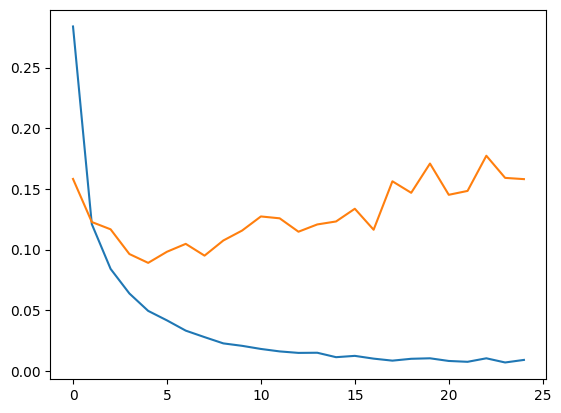

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

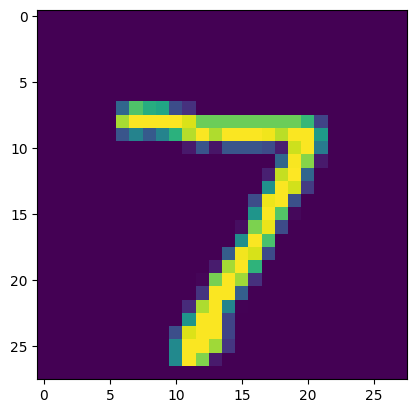

In [15]:
plt.imshow(X_test[0])

In [17]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 36ms/step


array([7])